<a href="https://colab.research.google.com/github/ElevenRitual-cyber/Data_Analysis/blob/main/stockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/TSLA.csv")

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [ ]:
### Converting Columns to Correct Data Types
print(df['Date'].dtype)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

object
datetime64[ns]


In [ ]:
## Checking for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
## sorting the in ascending order
df=df.sort_values(by='Date')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


<Axes: xlabel='Close'>

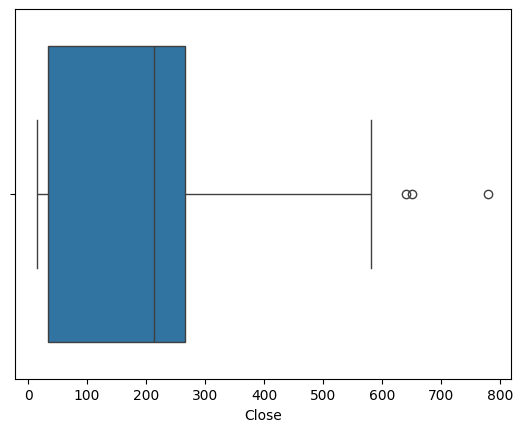

In [ ]:
## Identifying the Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.boxplot(x=df['Close'])

In [ ]:
### removing the outliers
q1=np.percentile(df['Close'],25)
q3=np.percentile(df['Close'],75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(f"Lower Fencing {lower} , Upper Fencing {upper}")

Lower Fencing -314.16248599999994 , Upper Fencing 615.3374819999999


In [ ]:
mask=(df['Close']>=lower) & (df['Close']>=upper)
df=df[~mask]

<Axes: xlabel='Close'>

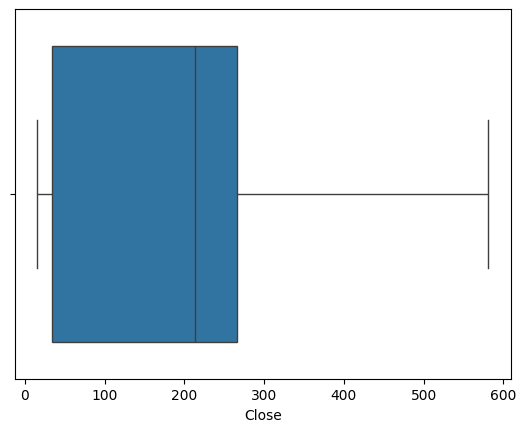

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Close'])

<Axes: xlabel='Close', ylabel='Count'>

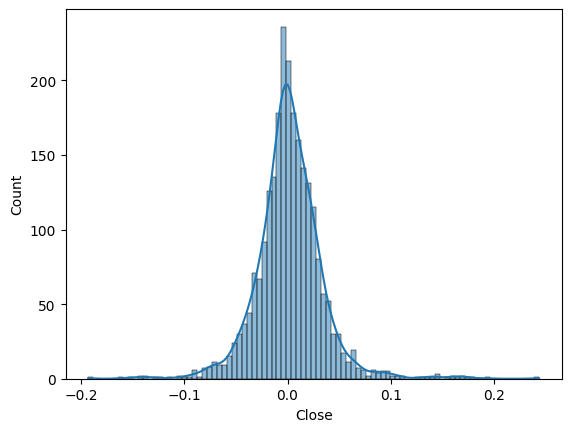

In [ ]:

sns.histplot(x=df['Close'].pct_change(),kde=True)

In [ ]:
## Feature Engineering
## Adding moving averages
## and daily change
df['MA5']=df['Adj Close'].rolling(window=5).mean()
df['MA10']=df['Adj Close'].rolling(window=10).mean()
df['Return']=df['Adj Close'].pct_change()
df.dropna(inplace=True)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,Return
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,17.169999,19.084,0.063930
10,2010-07-14,17.940001,20.150000,17.760000,19.840000,19.840000,4195200,17.977999,18.679,0.093716
11,2010-07-15,19.940001,21.500000,19.000000,19.889999,19.889999,3739800,18.463999,18.285,0.002520
12,2010-07-16,20.700001,21.299999,20.049999,20.639999,20.639999,2621300,19.111999,18.153,0.037707
13,2010-07-19,21.370001,22.250000,20.920000,21.910000,21.910000,2486500,20.083999,18.424,0.061531


In [ ]:
#####
target=df['Adj Close']
features=df[['Open','High','Low','Close','Volume','MA5','MA10','Return']]

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=40)

In [ ]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',Ridge())
])

In [ ]:
#### Choosing the best
from sklearn.model_selection import GridSearchCV
param_grid={
     'model': [Ridge(), Lasso()],  # Try LinearRegression, Ridge, and Lasso models
    'model__alpha': [0.01, 0.1,.2,.3,1, 10, 100],
}
grid_search=GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=5)

In [ ]:
grid_search.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+03, tolerance: 1.857e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.951e+03, tolerance: 1.801e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+03, tolerance: 1.807e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model': [Ridge(), Lasso()],
                         'model__alpha': [0.01, 0.1, 0.2, 0.3, 1, 10, 100]})

In [ ]:
ypred=grid_search.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score
print(f"The Mean Square Error is {mean_squared_error(ytest,ypred):.10f}")
print(f"The R2 Score is {r2_score(ytest,ypred):.10f}")

The Mean Square Error is 0.0019550788
The R2 Score is 0.9999998653


In [ ]:
# Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'Daily_Return']
sample_input = [[
    345.30,   # Open
    349.20,   # High
    342.50,   # Low
    346.10,   # Close (this can be your expected output for testing)
    32500000, # Volume
    340.10,   # MA_5
    335.80,   # MA_10
    0.0124    # Daily_Return
]]


p=grid_search.predict(sample_input)
print(p)

[346.10074128]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
### Saving the Model
import pickle
with open("tesla_stock_model.pkl",'wb') as f:
     pickle.dump(grid_search.best_estimator_, f)